In [9]:
import xml.etree.ElementTree as ET
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

In [10]:
class_mapping = {
    'person': 0,
    'bird': 1,
    'cat': 2,
    'cow': 3,
    'dog': 4,
    'horse': 5,
    'sheep': 6,
    'aeroplane': 7,
    'bicycle': 8,
    'boat': 9,
    'bus': 10,
    'car': 11,
    'motorbike': 12,
    'train': 13,
    'bottle': 14,
    'chair': 15,
    'diningtable': 16,
    'pottedplant': 17,
    'sofa': 18,
    'tvmonitor': 19,
    'background': 20,
    'void': 255
}
print(class_mapping["sofa"])

18


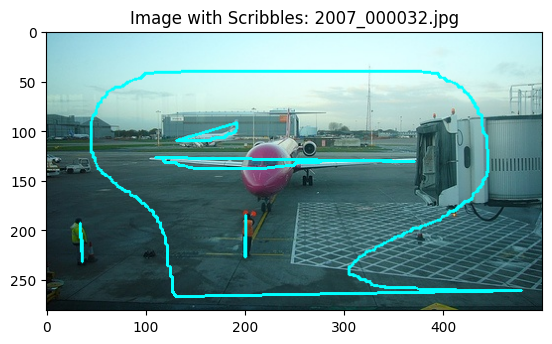

In [20]:
def read_scribble_xml(xml_file):
    #  Parse XML into Element Tree
    tree = ET.parse(xml_file)
    root = tree.getroot()

    #  Read meta data
    filename = root.find('filename').text
    width = int(root.find('size/width').text)
    height = int(root.find('size/height').text)
    depth = int(root.find('size/depth').text)

    scribbles = []
    #  Read all tags
    for polygon in root.findall('polygon'):
        tag = polygon.find('tag').text
        #  Read all points of this polygon(tag)
        points = [(int(point.find('X').text), int(point.find('Y').text)) for point in polygon.findall('point')]

        scribbles.append({'tag': tag, 'points': points})
        
    image_path = f"{'test_JPEGImages'}/{filename}"
    image = cv2.imread(image_path)

    # Draw the scribbles on the image
    for scribble in scribbles:
        points = np.array(scribble['points'], dtype=np.int32)
        cv2.polylines(image, [points], isClosed=True, color=(0, 255, 0), thickness=2)

    # Display the image with scribbles
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f"Image with Scribbles: {filename}")
    plt.show()

    return filename, width, height, depth, scribbles

# Example usage
xml_file_path = 'scribble/2007_000032.xml'
data = read_scribble_xml(xml_file_path)

